<a href="https://colab.research.google.com/github/tehilaeitan/EX20.11/blob/main/Audio_Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [8]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
  #sample_rate can improve generalization and lead to lower validation and test set errors. 
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
    #we will define a function to extract features 
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [9]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [10]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    #create our features and Label dataset.
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/sound_data/data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [12]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [13]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [14]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


Accuracy: 69.79%


******  CONFUSION MATRIX  *******
[[37  4  3  1]
 [ 3 30 10  5]
 [ 2  4 38  1]
 [ 4  6 15 29]]


******  CLASSIFICATION REPORT  *******
              precision    recall  f1-score   support

        calm       0.80      0.82      0.81        45
       happy       0.68      0.62      0.65        48
     fearful       0.58      0.84      0.68        45
     disgust       0.81      0.54      0.64        54

    accuracy                           0.70       192
   macro avg       0.72      0.71      0.70       192
weighted avg       0.72      0.70      0.70       192





['/content/drive/MyDrive/Colab Notebooks/finalized_model_MLP.sav']

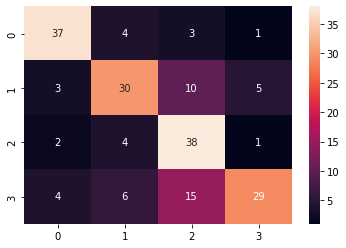

In [15]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\n")
print('******  CONFUSION MATRIX  *******')
print(cf_matrix)
print("\n")
print('******  CLASSIFICATION REPORT  *******')
print(classification_report(y_test, y_pred, target_names=observed_emotions))
print("\n")
sns.heatmap(cf_matrix, annot=True)
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_model_MLP.sav'
joblib.dump(model, filename)

Accuracy: 64.06%


******  CONFUSION MATRIX  *******
[[42  3  0  0]
 [11 32  0  5]
 [ 5 11 21  8]
 [ 4 11 11 28]]


******  CLASSIFICATION REPORT  *******
              precision    recall  f1-score   support

        calm       0.68      0.93      0.79        45
       happy       0.56      0.67      0.61        48
     fearful       0.66      0.47      0.55        45
     disgust       0.68      0.52      0.59        54

    accuracy                           0.64       192
   macro avg       0.64      0.65      0.63       192
weighted avg       0.65      0.64      0.63       192





['/content/drive/MyDrive/Colab Notebooks/finalized_model_RF.sav']

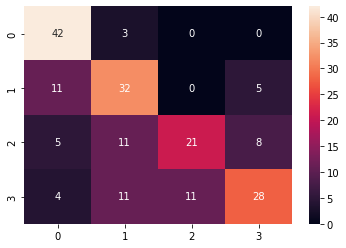

In [16]:
# Initialize the Random Forest Classifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\n")
print('******  CONFUSION MATRIX  *******')
print(cf_matrix)
print("\n")
print('******  CLASSIFICATION REPORT  *******')
print(classification_report(y_test, y_pred, target_names=observed_emotions))
print("\n")
sns.heatmap(cf_matrix, annot=True)
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_model_RF.sav'
joblib.dump(model, filename)

Accuracy: 55.73%


******  CONFUSION MATRIX  *******
[[31 15  7  0]
 [10 24  4  6]
 [ 4  3 26  9]
 [ 4  8 15 26]]


******  CLASSIFICATION REPORT  *******
              precision    recall  f1-score   support

        calm       0.63      0.58      0.61        53
       happy       0.48      0.55      0.51        44
     fearful       0.50      0.62      0.55        42
     disgust       0.63      0.49      0.55        53

    accuracy                           0.56       192
   macro avg       0.56      0.56      0.56       192
weighted avg       0.57      0.56      0.56       192





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['/content/drive/MyDrive/Colab Notebooks/finalized_model_LR.sav']

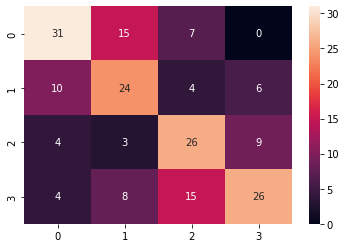

In [ ]:
# Initialize the LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\n")
print('******  CONFUSION MATRIX  *******')
print(cf_matrix)
print("\n")
print('******  CLASSIFICATION REPORT  *******')
print(classification_report(y_test, y_pred, target_names=observed_emotions))
print("\n")
sns.heatmap(cf_matrix, annot=True)
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_model_LR.sav'
joblib.dump(model, filename)

In [ ]:
# load the model from disk
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_model_RF.sav'
loaded_model = joblib.load(filename)
# test_file=files.save("/content/drive/MyDrive/Colab Notebooks/test.wav")

test=extract_feature("/content/drive/MyDrive/Colab Notebooks/sound_data/data/Actor_02/03-01-01-01-01-02-02.wav", mfcc=True, chroma=True, mel=True)
test = test.reshape(1, -1)
print(len(test))
y_pred=loaded_model.predict(test)
print(y_pred)

1
['happy']


# **Prediction through Microphone**

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import joblib

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
  #sample_rate can improve generalization and lead to lower validation and test set errors. 
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
    #we will define a function to extract features 
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, sr = get_audio()

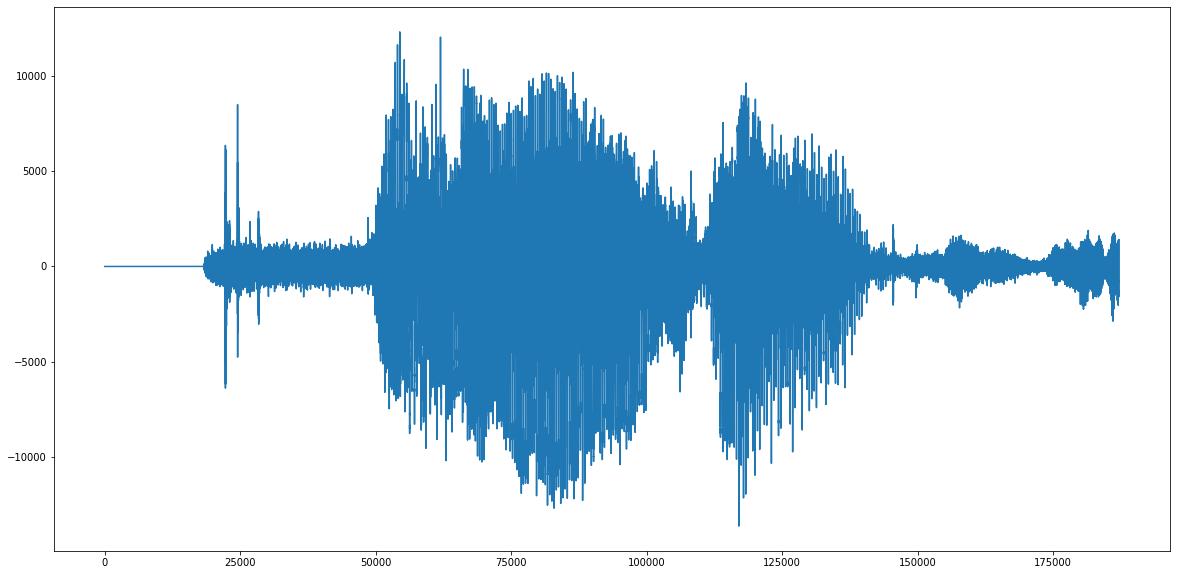

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

In [ ]:
import wave

wav = wave.open('myrecords.wav', "wb")
wav.setparams((1, 2, 48000, 0, 'NONE', 'not compressed'))
wav.writeframes(audio)
wav.close()

In [ ]:
import joblib
# load the model from disk
filename = '/content/finalized_model_MLP.sav'
loaded_model= joblib.load(filename)

test=extract_feature('/content/myrecords.wav', mfcc=True, chroma=True, mel=True)
test = test.reshape(1, -1)
print(len(test))
y_pred=loaded_model.predict(test)
print(y_pred)

1
['calm']


**Option upload wave file from pc**

In [ ]:
from google.colab import files
files.upload() 



In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

NameError: ignored

<Figure size 1440x720 with 0 Axes>

In [19]:
import wave

wav = wave.open('myaudio.wav', "wb")
wav.setparams((1, 2, 48000, 0, 'NONE', 'not compressed'))
wav.writeframes(audio)
wav.close()

NameError: ignored

In [ ]:
import joblib
# load the model from disk
filename = '/content/finalized_model_MLP.sav'
loaded_model= joblib.load(filename)

9test=extract_feature('/content/myaudio.wav', mfcc=True, chroma=True, mel=True)
test = test.reshape(1, -1)
print(len(test))
y_pred=loaded_model.predict(test)
print(y_pred)

1
['calm']


In [24]:
! pip install pyngrok

     |████████████████████████████████| 745 kB 8.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=09d3b0a7fd8b470b898e99720a87bbb3269a0b159e7871e2223311718aded9cb
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [25]:
! ngrok authtoken xxxxxx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
